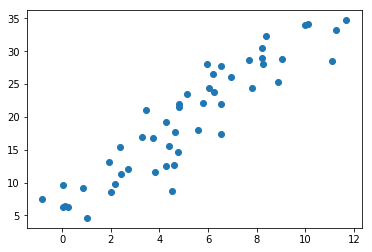

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
train_x = np.arange(0, 10, .2) + np.random.normal(size=50)
train_y = np.arange(0, 10, .2)*3 + 5 + np.random.normal(size=50)
plt.scatter(train_x, train_y)
plt.show()

In [23]:
class Line():
    def __init__(self):
        """
        Initializes weights
        """
        self.weights = np.array([1, 1]).astype(float)
    
    def prediction(self, X):
        """
        Evaluates yhat given some NUMBER list X of shape [None]
        """
        if type(X) != list and type(X) != np.ndarray:
            return self.weights[0] + self.weights[1] * X
        return np.array([self.weights[0] + self.weights[1]*x for x in X])
    
    
    def plot(self, X, Y):
        """
        Plots internal weights vs scatter points X, Y
        """
        plt.scatter(X, Y)
        plt.plot(X, self.prediction(X))

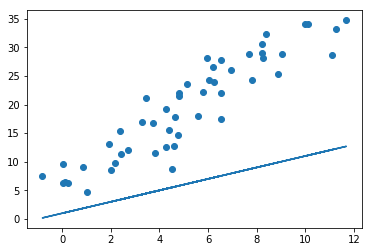

In [24]:
line = Line()
line.plot(train_x, train_y)

In [25]:
class LinearClassifier(Line):
    def __init__(self, learning_rate):
        super().__init__()
        self.loss = []
        self.alpha = learning_rate
        
    
    @classmethod
    def error(self, y, yhat):
        """
        Computes ((y-yhat)^2)/2
        """
        return ((yhat - y)**2)/2
 

    def optimize(self, X, Y): 
        """
        Runs stochastic gradient descent algorithm and updates weights
        given inputs X and labels Y and returns final loss
        """
        for i in range(len(X)):
            x = X[i]
            y = Y[i]
            self.weights[0] = self.weights[0] - self.alpha * (self.prediction(x) - y)
            self.weights[1] = self.weights[1] - self.alpha * x * (self.prediction(x) - y)
            # print('w0: {0}, w1: {1}, err: {2}'.format(self.weights[0], 
            #    self.weights[1], self.error(y, self.prediction(x))))
        return self.error(y, self.prediction(x))
    
    
    def train(self, X, Y, iterations):
        """
        Begins training cycle by updating internal weights, and loss.
        """
        self.loss = np.array([self.optimize(X, Y) for i in range(iterations)])
        
            
    def plot_error(self):
        """
        Plots error from stochastic gradient descent optimization
        """
        plt.plot(range(len(self.loss)), self.loss)
        plt.xlabel('epochs')
        plt.ylabel('loss')
        plt.show()

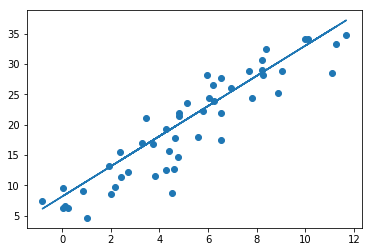

In [26]:
classifier = LinearClassifier(0.007)
classifier.train(train_x, train_y, 1000)
classifier.plot(train_x, train_y)

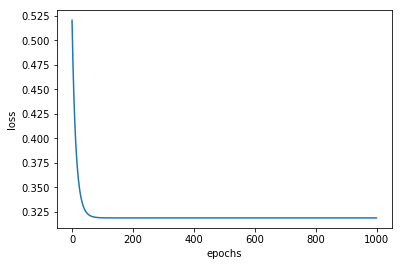

In [27]:
classifier.plot_error()